# TSA HW #07

Name: Dhanabordee Mekintharanggur

Student ID: T11902203

In [1]:
! pip install --upgrade Cython
!pip install --verbose statsmodels==0.13.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.co

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import math
import calendar
import statsmodels.api as sm
import statsmodels.tsa as smtsa
import statsmodels.graphics as smg
from random import gauss
from random import seed
from pandas import Series
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


In [3]:
# Figure settings
sb.set(rc={'figure.figsize':(14,7)})
sb.set_style({'axes.grid' : True})

In [5]:
# read the co2 data and save as a dataframe
data=pd.read_csv('/content/TSA HW07.co2.csv')

# convert months to indices to be grouped as categories
dataMonthConverted = data.copy()
dataMonthConverted['month'] = [list(calendar.month_abbr).index(month) for month in data['month']]

data

,time_trend,month,co2_level
0,1994.000000,Jan,363.05
1,1994.083333,Feb,364.18
2,1994.166667,Mar,364.87
3,1994.250000,Apr,364.47
4,1994.333333,May,364.32
...,...,...,...
127,2004.583333,Aug,368.69
128,2004.666667,Sep,368.55
129,2004.750000,Oct,373.39
130,2004.833333,Nov,378.49


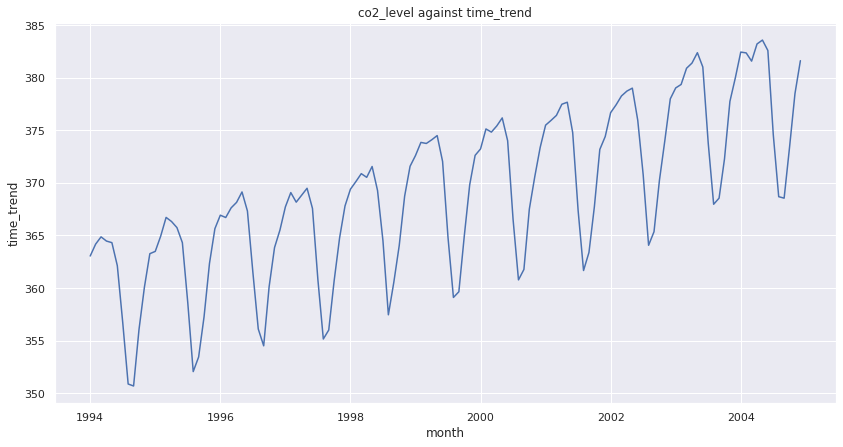

In [6]:
t = data['time_trend']
y = data['co2_level']

plt.xlabel("month")
plt.ylabel("time_trend")
plt.title('co2_level against time_trend')
sb.lineplot(x = t, y = y, color = "b")

## Question 5: (15%) Consider the famous time series data “co2” (monthly carbon dioxide through 11 years in Alert, Canada).

#### a) Fit a deterministic regression model in terms of months and time. Are the regression coefficients significant? What is the adjusted R-squared? (Note that the month variable should be treated as categorical and transformed into 11 dummy variables.)

**Note**: the month of March has been dropped to colinearity among variables

In [52]:
monthsData = pd.get_dummies(data)
monthsData.head()
monthsData = monthsData.drop('month_Mar', axis=1)
monthsData

,time_trend,co2_level,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_May,month_Nov,month_Oct,month_Sep
0,1994.000000,363.05,0,0,0,0,1,0,0,0,0,0,0
1,1994.083333,364.18,0,0,0,1,0,0,0,0,0,0,0
2,1994.166667,364.87,0,0,0,0,0,0,0,0,0,0,0
3,1994.250000,364.47,1,0,0,0,0,0,0,0,0,0,0
4,1994.333333,364.32,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2004.583333,368.69,0,1,0,0,0,0,0,0,0,0,0
128,2004.666667,368.55,0,0,0,0,0,0,0,0,0,0,1
129,2004.750000,373.39,0,0,0,0,0,0,0,0,0,1,0
130,2004.833333,378.49,0,0,0,0,0,0,0,0,1,0,0


In [54]:
X = monthsData[[
    'time_trend',
    "month_Jan", 
    "month_Feb",
    "month_Apr",
    "month_May",
    "month_Jun",
    "month_Jul",
    "month_Aug",
    "month_Sep",
    "month_Oct",
    "month_Nov",
    "month_Dec"]]
Y = data[['co2_level']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              co2_level   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     997.7
Date:                Wed, 23 Nov 2022   Prob (F-statistic):          2.93e-113
Time:                        02:54:17   Log-Likelihood:                -151.49
No. Observations:                 132   AIC:                             329.0
Df Residuals:                     119   BIC:                             366.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3289.5775     44.183    -74.454      0.0

**Are the regression coefficients significant?**

The p-value can be usec to determine whether the coefficients are significant. If the p-value is less than the signifiance level then this sample data has enough evidence to reject the null hypothesis. The null hypothesis states that there's no correlation between the dependent variables. By having a p value lower than the significance level, the null hypothesis is rejected, meaning the coefficients from this model are significant.

Most coefficients has p-values are below the significance level of 2.5%.
The months of Feb and May has p-values exceeing 2.5% and thus their coefficients are regarded as insignificant.


**What is the adjusted R-squared?**

The Adjusted R-squared determines how well the model fits the data (model accuracy) with the percentage of variance in each field.

The Adjusted R-squred found is 0.989, signifying that the model is 98.9% effective.

### (b) Identify, estimate the SARIMA model for the co2 level.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


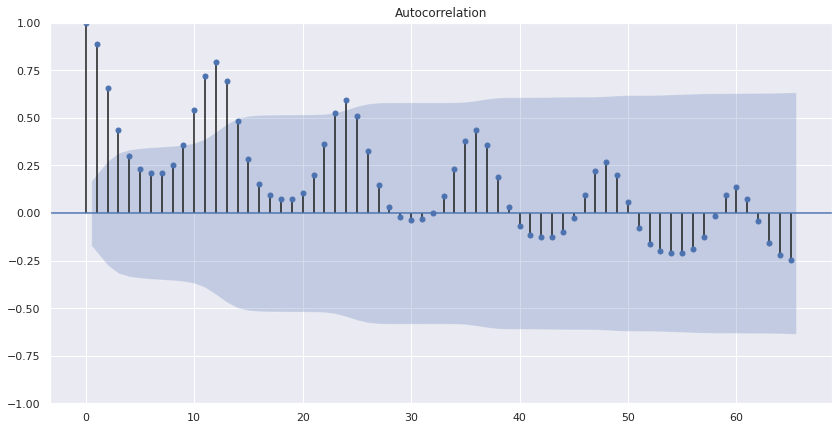

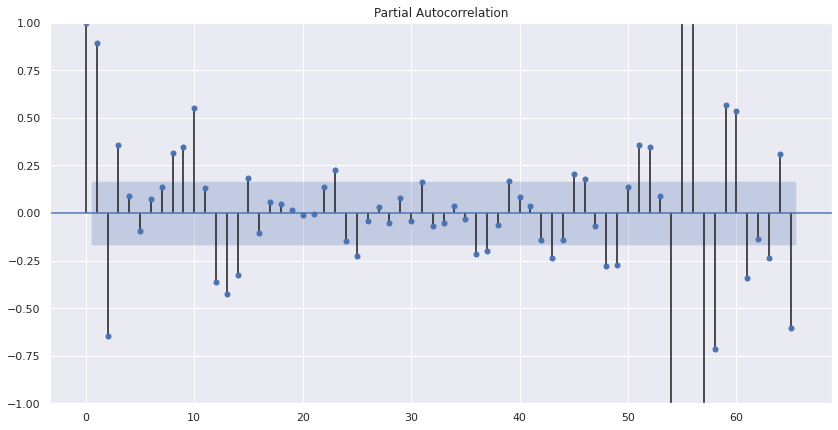

In [55]:
smg.tsaplots.plot_acf(data['co2_level'], lags = len(data['co2_level'])/2 -1);
smg.tsaplots.plot_pacf(data['co2_level'], lags = len(data['co2_level'])/2 -1);

The ACF plot shows a tail-off intraseasonal trend each year.

Additionally, the ACF plot also shows a big exponential interseasonal trend observable from the lower highs.

Note that there since there are 12 months in a year, we can define $s = 12$

This behavior suggests that the model follows $ARIMA(1,0,0) x (1,0,0)_{12}$

### (c) Compare the two models above, what do you observe?

In [56]:
# create the sampled ARIMA(1,0,0)x(1,0,0)_12 model 
model = smtsa.statespace.sarimax.SARIMAX(Y, exog = X, order = (1,0,0), seasonal_order = (1,0,0,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          co2_level   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -130.743
Date:                            Wed, 23 Nov 2022   AIC                            293.485
Time:                                    02:54:19   BIC                            339.610
Sample:                                         0   HQIC                           312.228
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3289.5775     73.782    -44.585      0.000   -3434.187   -3144.968
time_trend     1.8321      0.037   

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


#### Discussion for Question 3

**Model COmparison**

Since the SARIMA model takes into consideration the seasonality of data as oppose to the regression model. The co2 data itself displays a clear seasonal trend. Thus, the $ARIMA(1,0,0)x(1,0,0)_{12}$ should be better at modeling the data.

To confirm this, let's use AIC and BIC values to confirm.

**Minimum AIC and BIC values are used as model selection criteria.**

Akaike's Information Criteron (AIC) is an information criteria that punishes the number of parameters used. 

AIC is defined as:
AIC = $-2ln(\hat{L}) + 2r = n ln(2\pi) + n * ln(\hat{\sigma_a^2} + n + 2(p + q + 1) $

BIC is defined as:

$BIC =k\ln(n)-2\ln({\widehat {L}})$

The smaller the AIC and BIC, the better the model fitting is.

Previously when fitting the data with OLS regression, the AIC and BIC value obtained as 

AIC: 329.0

BIC: 366.4

Using the $ARIMA(1,0,0)x(1,0,0)_{12}$ to sample the data resutls in AIC and BIC value as follows


AIC 293.485

BIC 339.610



**It can be observed that the $ARIMA(1,0,0)x(1,0,0)_{12}$ has better performance than OLS regression** as the AIC and BIC of ARIMA model is lower. 

This is possibly due to the big number of parameters (each month, the time_trend, and the co2_level).

Suppose that there is in increase in the parameters required to model the data, then hypothetically, the model should perform worse with higher AIC and BIC.

For example, please refer to the following ARIMA model summary:

In [57]:
# create the sampled ARIMA(3,0,0)x(3,0,0)_12 model 
model = smtsa.statespace.sarimax.SARIMAX(Y, exog = X, order = (8,0,0), seasonal_order = (8,0,0,12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          co2_level   No. Observations:                  132
Model:             SARIMAX(8, 0, 0)x(8, 0, 0, 12)   Log Likelihood                -132.865
Date:                            Wed, 23 Nov 2022   AIC                            325.730
Time:                                    02:54:43   BIC                            412.214
Sample:                                         0   HQIC                           360.873
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3289.5775    118.331    -27.800      0.000   -3521.503   -3057.652
time_trend     1.8321      0.059   

With the $ARIMA(8,0,0)x(8,0,0)_{12}$

AIC 325.730

BIC 412.214

The AIC is now almost equivalent to the one obtained with the OLS regression, and the BIC is not significantly higher.

Moreover, some coefficients has p-values that lie outside the significant level and fails to reject the null hypothesis, further confirming the negative effects of increasing the number of parameters on the model performance.

### Conclusion

1. Juding from the characteristics of the ACF plot, the SARIMA model can be estimated.


2. The SARIMA model $ARIMA(1,0,0)x(1,0,0)_{12}$ is able to perform better than the OLS regression model in fitting the data judging from AIC and BIC.

3. As the number of parameters increase, the model performance decreases.

4. The $ARIMA(1,0,0)x(1,0,0)_{12}$ model takes into consideration the seasonality of the data, and thus is a better fit for the CO2 data provided. This is supported by the lower AIC and BIC values compared to the OLS regression.